In [0]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
sns.set(style="ticks", color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import timeit
from tensorflow.keras.callbacks import EarlyStopping

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#Loading Data set
X_train_csv = pd.read_csv("/content/drive/My Drive/ECE657a_a3_2/train.csv")
X_test_csv = pd.read_csv("/content/drive/My Drive/ECE657a_a3_2/testX.csv")

In [0]:
#traing portion
X_train_d=pd.DataFrame(X_train_csv)
X_train_t=X_train_d.drop(['Id','Label'],axis=1)
y_train_t=X_train_d['Label']

In [0]:
#test portion
X_test_d=pd.DataFrame(X_test_csv)
X_test=X_test_d.drop(['Id'],axis=1)

In [0]:
#np_array conversion
X_train_np=np.array(X_train_t,dtype='float32')
X_test_np=np.array(X_test,dtype='float32')
y_train_np=np.array(y_train_t,dtype='int32')

In [0]:
#Scaling
X_train_sd=X_train_np/255
X_test_sd=X_test_np/255

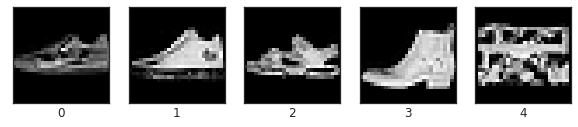

In [0]:
#plotting some of the images of unique items
u, indices = np.unique(y_train_np, return_index=True)
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_sd[indices[i], :].reshape((28, 28)),cmap="gray")
    plt.xlabel(u[i])
plt.show()

In [0]:
#Train test split (with scaled data)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_sd,y_train_np,test_size=0.2,random_state=42)

CNN Model Creation

In [0]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import  TensorBoard

Using TensorFlow backend.


In [0]:
im_rows = 28
im_cols = 28
batch_size =512
im_shape = (im_rows, im_cols, 1)
X_train=X_train.reshape(X_train.shape[0],*im_shape)
X_valid=X_valid.reshape(X_valid.shape[0],*im_shape)
X_test_f=X_test_sd.reshape(X_test_sd.shape[0],*im_shape)
print('x_train shape: {}'.format(X_train.shape))
print('x_test shape: {}'.format(X_test_f.shape))
print('x_validate shape: {}'.format(X_valid.shape))

x_train shape: (48000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
x_validate shape: (12000, 28, 28, 1)


In [0]:
#model
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=32,kernel_size=3, activation='relu', input_shape=im_shape))
cnn_model.add(MaxPool2D((2, 2)))
cnn_model.add(Dropout(0.15))
cnn_model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn_model.add(MaxPool2D((2, 2)))
cnn_model.add(Dropout(0.15))
cnn_model.add(Flatten())
cnn_model.add(Dense(units=128, activation='relu'))
cnn_model.add(Dense(5, activation='softmax'))
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto',
      restore_best_weights=True)


In [0]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)             

In [0]:
cnn_model.compile(optimizer=keras.optimizers.Adam(lr = 0.001),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [0]:
hist=cnn_model.fit(X_train,y_train,batch_size=batch_size,
              epochs=200,verbose=1,
              validation_data = (X_valid,y_valid),
              callbacks=[monitor]
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/200
48000/48000 [==============================] - 8s 169us/step - loss: 0.8991 - accuracy: 0.6117 - val_loss: 0.6407 - val_accuracy: 0.7340
Epoch 2/200
48000/48000 [==============================] - 2s 33us/step - loss: 0.6009 - accuracy: 0.7528 - val_loss: 0.5319 - val_accuracy: 0.7874
Epoch 3/200
48000/48000 [==============================] - 2s 33us/step - loss: 0.5287 - accuracy: 0.7860 - val_loss: 0.5005 - val_accuracy: 0.7955
Epoch 4/200
48000/48000 [==============================] - 2s 33us/step - loss: 0.4899 - accuracy: 0.8041 - val_loss: 0.4477 - val_accuracy: 0.8242
Epoch 5/200
48000/48000 [==============================] - 2s 33us/step - loss: 0.4639 - accuracy: 0.8142 - val_loss: 0.4205 - val_accuracy: 0.8356
Epoch 6/200
48000/48000 [==============================] - 2s 33us/step - loss: 0.4382 - accuracy: 0.8256 - val_loss: 0.4077 - val_accuracy: 0.8394
Epoch 7/200
48000/48000 [==============================] - 2s

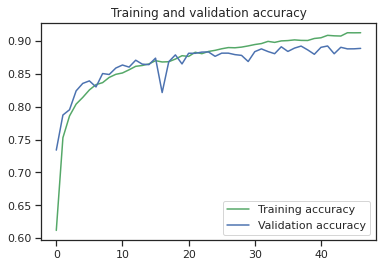

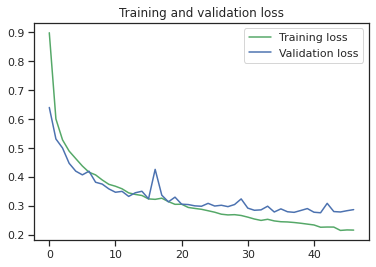

In [0]:
# Graph plotting
accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'g', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
start = timeit.default_timer()
y_pred = cnn_model.predict_classes(X_valid)
stop = timeit.default_timer()
t_basic_cnn=stop - start
print('Time: ', t_basic_cnn) 

Time:  0.5264329769999847


In [0]:
#classificaiton report
from sklearn.metrics import classification_report
y_pred = cnn_model.predict_classes(X_valid)
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4']
print(classification_report(y_valid, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.95      0.96      0.95      2379
     class 1       0.88      0.89      0.88      2424
     class 2       0.85      0.84      0.84      2364
     class 3       0.88      0.84      0.86      2367
     class 4       0.91      0.93      0.92      2466

    accuracy                           0.89     12000
   macro avg       0.89      0.89      0.89     12000
weighted avg       0.89      0.89      0.89     12000



In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_valid, y_pred)

array([[2283,   79,   14,    2,    1],
       [ 106, 2162,  121,   29,    6],
       [  15,  179, 1987,  124,   59],
       [   0,   40,  199, 1977,  151],
       [   6,    8,   29,  121, 2302]])

In [0]:
y_test_f=cnn_model.predict_classes(X_test_f)
y_test_f_df=pd.DataFrame(y_test_f, columns=['Label'])

In [0]:
frames = [X_test_d['Id'],y_test_f_df]
output = pd.concat(frames,axis=1)

In [0]:
# from google.colab import files
# output.to_csv ('output.csv',index = False, header=True)
# files.download('output.csv')
# #88.57 kaggle accuracy


**Keras Tuner for improving accuracy**

In [0]:
!pip install -U keras-tuner


     |████████████████████████████████| 61kB 4.8MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.1-cp36-none-any.whl size=73200 sha256=71107e03d208d7af58cf178180102d4969dcffafbb6a294dc37a3356fbb1af06
  Stored in directory: /root/.cache/pip/wheels/b9/cc/62/52716b70dd90f3db12519233c3a93a5360bc672da1a10ded43
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15356 sha256=952cf670b4fd059aea0980bbe8cbc44e4d67ba2e209b41eb1fa4e28a18f88c80
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [0]:
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto',
      restore_best_weights=True)

In [0]:
#Defining model for keras tuner
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
from tensorflow.keras.callbacks import EarlyStopping
def build_model(hp):
  cnn_model = keras.Sequential()
  cnn_model.add(keras.layers.Conv2D(filters=hp.Int('filter_1',min_value=32,max_value=64,step=16), 
                                    kernel_size=hp.Choice('kernel_1', values = [3,5]),
                                    activation='relu', input_shape=im_shape))
  cnn_model.add(keras.layers.MaxPool2D((2, 2)))
  cnn_model.add(keras.layers.Dropout(0.15))
  cnn_model.add(keras.layers.Conv2D(filters=hp.Int('filter_2', min_value=64, max_value=128, step=16),
                                    kernel_size=hp.Choice('kernel_2', values = [3,5]),
                                    activation='relu'))
  cnn_model.add(keras.layers.MaxPool2D((2, 2)))
  cnn_model.add(keras.layers.Dropout(0.15))
  cnn_model.add(keras.layers.Flatten())
  cnn_model.add(keras.layers.Dense(units=hp.Int('dense_unit', min_value=32, max_value=128, step=16),
                                  activation='relu'))
  cnn_model.add(keras.layers.Dense(5, activation='softmax'))
  cnn_model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',
                      values=[1e-2, 1e-3, 1e-4])),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
  return cnn_model
  monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto',
      restore_best_weights=True)

In [0]:
k_tuner=RandomSearch(build_model,
                objective='val_accuracy',
                max_trials=5,directory='output')

In [0]:
k_tuner.search_space_summary()

In [0]:
k_tuner.search(X_train, y_train,epochs=50,validation_data=(X_valid, y_valid), callbacks=[monitor])

Epoch 1/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.8693 - accuracy: 0.6238 - val_loss: 0.6581 - val_accuracy: 0.7261
Epoch 2/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6247 - accuracy: 0.7441 - val_loss: 0.5557 - val_accuracy: 0.7797
Epoch 3/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5563 - accuracy: 0.7743 - val_loss: 0.5132 - val_accuracy: 0.7986
Epoch 4/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5146 - accuracy: 0.7933 - val_loss: 0.4760 - val_accuracy: 0.8083
Epoch 5/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4854 - accuracy: 0.8062 - val_loss: 0.4431 - val_accuracy: 0.8280
Epoch 6/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4616 - accuracy: 0.8176 - val_loss: 0.4558 - val_accuracy: 0.8143
Epoch 7/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4425 - accuracy: 0.8265 - val_loss: 0.4086 - val_accuracy:

Epoch 1/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.8082 - accuracy: 0.6542 - val_loss: 0.5934 - val_accuracy: 0.7616
Epoch 2/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5745 - accuracy: 0.7637 - val_loss: 0.5180 - val_accuracy: 0.7926
Epoch 3/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5133 - accuracy: 0.7932 - val_loss: 0.4761 - val_accuracy: 0.8131
Epoch 4/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4776 - accuracy: 0.8114 - val_loss: 0.4556 - val_accuracy: 0.8202
Epoch 5/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4479 - accuracy: 0.8229 - val_loss: 0.4307 - val_accuracy: 0.8285
Epoch 6/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4265 - accuracy: 0.8320 - val_loss: 0.3956 - val_accuracy: 0.8495
Epoch 7/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4065 - accuracy: 0.8413 - val_loss: 0.3822 - val_accuracy:

Epoch 1/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.5965 - accuracy: 0.7491 - val_loss: 0.4538 - val_accuracy: 0.8125
Epoch 2/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4358 - accuracy: 0.8230 - val_loss: 0.3838 - val_accuracy: 0.8442
Epoch 3/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3931 - accuracy: 0.8410 - val_loss: 0.3568 - val_accuracy: 0.8539
Epoch 4/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3605 - accuracy: 0.8538 - val_loss: 0.3374 - val_accuracy: 0.8636
Epoch 5/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3324 - accuracy: 0.8658 - val_loss: 0.3270 - val_accuracy: 0.8630
Epoch 6/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3120 - accuracy: 0.8727 - val_loss: 0.3208 - val_accuracy: 0.8703
Epoch 7/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2964 - accuracy: 0.8787 - val_loss: 0.3369 - val_accuracy:

Epoch 1/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.8954 - accuracy: 0.6113 - val_loss: 0.6700 - val_accuracy: 0.7237
Epoch 2/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.6484 - accuracy: 0.7319 - val_loss: 0.5796 - val_accuracy: 0.7664
Epoch 3/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.5837 - accuracy: 0.7617 - val_loss: 0.5254 - val_accuracy: 0.7903
Epoch 4/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.5431 - accuracy: 0.7818 - val_loss: 0.4947 - val_accuracy: 0.8040
Epoch 5/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.5140 - accuracy: 0.7930 - val_loss: 0.4793 - val_accuracy: 0.8121
Epoch 6/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.4947 - accuracy: 0.8015 - val_loss: 0.4495 - val_accuracy: 0.8213
Epoch 7/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.4726 - accuracy: 0.8118 - val_loss: 0.4460 - val_accuracy:

Epoch 1/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.6376 - accuracy: 0.7325 - val_loss: 0.4734 - val_accuracy: 0.8046
Epoch 2/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5214 - accuracy: 0.7845 - val_loss: 0.4391 - val_accuracy: 0.8240
Epoch 3/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4970 - accuracy: 0.7972 - val_loss: 0.4677 - val_accuracy: 0.8040
Epoch 4/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4848 - accuracy: 0.7992 - val_loss: 0.4715 - val_accuracy: 0.8029
Epoch 5/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4745 - accuracy: 0.8060 - val_loss: 0.4765 - val_accuracy: 0.8004
Epoch 6/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4724 - accuracy: 0.8063 - val_loss: 0.4191 - val_accuracy: 0.8231
Epoch 7/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4658 - accuracy: 0.8111 - val_loss: 0.4889 - val_accuracy:

INFO:tensorflow:Oracle triggered exit


In [0]:
k_tuner.results_summary()

In [0]:
best_model = k_tuner.get_best_models(num_models=1)

In [0]:
#classificaiton report
from sklearn.metrics import classification_report
y_pred = best_model[0].predict_classes(X_valid)
y_pred
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4']
print(classification_report(y_valid, y_pred, target_names=target_names))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
              precision    recall  f1-score   support

     class 0       0.95      0.96      0.95      2379
     class 1       0.87      0.89      0.88      2424
     class 2       0.85      0.85      0.85      2364
     class 3       0.87      0.84      0.86      2367
     class 4       0.92      0.94      0.93      2466

    accuracy                           0.89     12000
   macro avg       0.89      0.89      0.89     12000
weighted avg       0.89      0.89      0.89     12000



In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_valid, y_pred)

array([[2277,   84,   16,    0,    2],
       [ 104, 2148,  127,   39,    6],
       [  13,  173, 2004,  140,   34],
       [   0,   44,  172, 1995,  156],
       [   4,   10,   31,  114, 2307]])

In [0]:
start = timeit.default_timer()
y_pred = best_model[0].predict_classes(X_valid)
stop = timeit.default_timer()
t_basic_cnn_tuner=stop - start
print('Time: ', t_basic_cnn_tuner) 

Time:  0.3175025640000513


In [0]:
y_test_f=best_model[0].predict_classes(X_test_f)
y_test_f_df=pd.DataFrame(y_test_f, columns=['Label'])

In [0]:
frames = [X_test_d['Id'],y_test_f_df]
output = pd.concat(frames,axis=1)

In [0]:
# from google.colab import files
# output.to_csv ('output.csv',index = False, header=True)
# files.download('output.csv')

**Data Augmentation**

In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    featurewise_center=False,  
    samplewise_center=False, 
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,  
    vertical_flip=False)

datagen.fit(X_train)

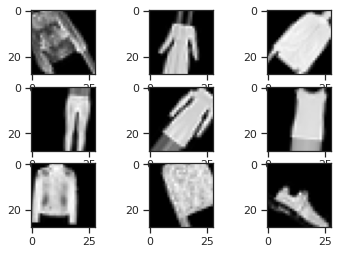

In [0]:
#plotting augmented images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		plt.subplot(330 + 1 + i)
		plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
	# show the plot
	plt.show()
	break

In [0]:
aug_model = keras.Sequential()
aug_model.add(keras.layers.Conv2D(filters=32, kernel_size=3,
                                  activation='relu', input_shape=im_shape))
aug_model.add(keras.layers.MaxPool2D((2, 2)))
aug_model.add(keras.layers.Dropout(0.15))
aug_model.add(keras.layers.Conv2D(filters=64,
                                  kernel_size=3,
                                  activation='relu'))
aug_model.add(keras.layers.MaxPool2D((2, 2)))
aug_model.add(keras.layers.Dropout(0.15))
aug_model.add(keras.layers.Flatten())
aug_model.add(keras.layers.Dense(units=128,activation='relu'))
aug_model.add(keras.layers.Dense(5, activation='softmax'))
aug_model.compile(optimizer=keras.optimizers.Adam(learning_rate=.001),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])


In [0]:
augmented_model_details = aug_model.fit_generator(datagen.flow(X_train, y_train, batch_size = 32),
                    steps_per_epoch = len(X_train) / 32,
                    epochs = 500,
                    validation_data= (X_valid, y_valid),
                    callbacks=[monitor],
                    verbose=1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/500
1500/1500 [==============================] - 15s 10ms/step - loss: 0.9897 - accuracy: 0.5615 - val_loss: 0.7376 - val_accuracy: 0.6973
Epoch 2/500
1500/1500 [==============================] - 15s 10ms/step - loss: 0.7946 - accuracy: 0.6609 - val_loss: 0.7428 - val_accuracy: 0.6854
Epoch 3/500
1500/1500 [==============================] - 15s 10ms/step - loss: 0.7262 - accuracy: 0.6960 - val_loss: 0.5622 - val_accuracy: 0.7778
Epoch 4/500
1500/1500 [==============================] - 15s 10ms/step - loss: 0.6902 - accuracy: 0.7139 - val_loss: 0.5733 - val_accuracy: 0.7684
Epoch 5/500
1500/1500 [==============================] - 15s 10ms/step - loss: 0.6577 - accuracy: 0.7272 - val_loss: 0.5317 - val_accuracy: 0.7872
Epoch 6/500
1500/1500 [==============================] - 15s 10ms/step - loss: 0.6383 - accuracy: 0.7405 - val_loss: 0.5465 - val_accuracy: 0.7824
Epoch 7/500
1500/1500 [===================

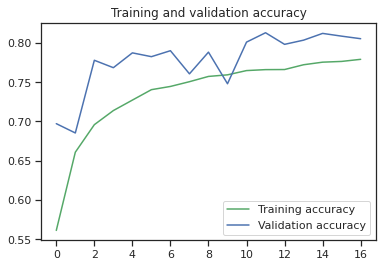

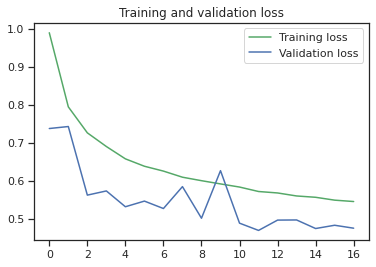

In [0]:

# Graph plotting
accuracy = augmented_model_details.history['accuracy']
val_accuracy = augmented_model_details.history['val_accuracy']
loss = augmented_model_details.history['loss']
val_loss = augmented_model_details.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'g', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
#classificaiton report
from sklearn.metrics import classification_report
y_pred = aug_model.predict_classes(X_valid)
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4']
print(classification_report(y_valid,y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.92      0.91      0.92      2379
     class 1       0.77      0.84      0.80      2424
     class 2       0.80      0.65      0.72      2364
     class 3       0.76      0.72      0.74      2367
     class 4       0.81      0.94      0.87      2466

    accuracy                           0.81     12000
   macro avg       0.81      0.81      0.81     12000
weighted avg       0.81      0.81      0.81     12000



In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_valid, y_pred)

array([[2172,  149,   50,    0,    8],
       [ 154, 2027,  145,   76,   22],
       [  35,  355, 1532,  361,   81],
       [   0,   82,  157, 1703,  425],
       [   5,    5,   32,  104, 2320]])

In [0]:
start = timeit.default_timer()
y_pred = aug_model.predict_classes(X_valid)
stop = timeit.default_timer()
t_basic_cnn_tuner=stop - start
print('Time: ', t_basic_cnn_tuner) 

Time:  0.31762253400006557


In [0]:
y_test_f=aug_model.predict_classes(X_test_f)
y_test_f_df=pd.DataFrame(y_test_f, columns=['Label'])
frames = [X_test_d['Id'],y_test_f_df]
output = pd.concat(frames,axis=1)

In [0]:
frames = [X_test_d['Id'],y_test_f_df]
output = pd.concat(frames,axis=1)

In [0]:
# from google.colab import files
# output.to_csv ('output.csv',index = False, header=True)
# files.download('output.csv')

**Autoencoder**

In [0]:
from sklearn.model_selection import train_test_split
from keras.layers.normalization import BatchNormalization
from keras.layers import Input,Dense,Flatten,Dropout,merge,Reshape,Conv2D,MaxPooling2D,UpSampling2D,Conv2DTranspose
X_train, X_valid, y_train, y_valid = train_test_split(X_train_sd.reshape(-1, 28,28, 1),
                                                      X_train_sd.reshape(-1, 28,28, 1),test_size=0.2,random_state=42)
batch_size = 64
epoch_size = 50
chan = 1
x_dim, y_dim = 28, 28
input_image = Input(shape = (x_dim, y_dim, chan))
num_classes = 5

In [0]:
from keras.models import Model,Sequential
from keras.layers import Input
from keras.optimizers import Adadelta, RMSprop,SGD,Adam
def encoder(input_image):
    conv_lyr_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_image) 
    conv_lyr_1 = BatchNormalization()(conv_lyr_1)
    conv_lyr_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv_lyr_1)
    conv_lyr_1 = BatchNormalization()(conv_lyr_1)
    pool_lyr_1 = MaxPooling2D(pool_size=(2, 2))(conv_lyr_1) 
    conv_lyr_2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool_lyr_1) 
    conv_lyr_2 = BatchNormalization()(conv_lyr_2)
    conv_lyr_2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv_lyr_2)
    conv_lyr_2 = BatchNormalization()(conv_lyr_2)
    pool_lyr_1  = MaxPooling2D(pool_size=(2, 2))(conv_lyr_2) 
    conv_lyr_3  = Conv2D(128, (3, 3), activation='relu', padding='same')(pool_lyr_1 ) 
    conv_lyr_3  = BatchNormalization()(conv_lyr_3 )
    conv_lyr_3  = Conv2D(128, (3, 3), activation='relu', padding='same')(conv_lyr_3 )
    conv_lyr_3  = BatchNormalization()(conv_lyr_3 )
    conv_lyr_4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv_lyr_3 ) 
    conv_lyr_4 = BatchNormalization()(conv_lyr_4)
    conv_lyr_4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv_lyr_4)
    conv_lyr_4 = BatchNormalization()(conv_lyr_4)
    return conv_lyr_4

def decoder(conv_lyr_4):    
    conv_lyr_5 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv_lyr_4) 
    conv_lyr_5 = BatchNormalization()(conv_lyr_5)
    conv_lyr_5 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv_lyr_5)
    conv_lyr_5 = BatchNormalization()(conv_lyr_5)
    conv_lyr_6 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv_lyr_5) 
    conv_lyr_6 = BatchNormalization()(conv_lyr_6)
    conv_lyr_6 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv_lyr_6)
    conv_lyr_6 = BatchNormalization()(conv_lyr_6)
    up_scale_1 = UpSampling2D((2,2))(conv_lyr_6) 
    conv_lyr_7 = Conv2D(32, (3, 3), activation='relu', padding='same')(up_scale_1) 
    conv_lyr_7 = BatchNormalization()(conv_lyr_7)
    conv_lyr_7 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv_lyr_7)
    conv_lyr_7 = BatchNormalization()(conv_lyr_7)
    up_scale_2 = UpSampling2D((2,2))(conv_lyr_7) 
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up_scale_2) 
    return decoded

In [0]:
autoencoder = Model(input_image, decoder(encoder(input_image)))
autoencoder.compile(loss='mean_squared_error', optimizer = RMSprop())


In [0]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        1849

In [0]:
autoencoder_train = autoencoder.fit(X_train, y_train, 
                                    batch_size=batch_size,
                                    epochs=epoch_size,
                                    verbose=1,
                                    callbacks=[monitor],
                        validation_data=(X_valid, y_valid))


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 36s 751us/step - loss: 0.0195 - val_loss: 0.0122
Epoch 2/50
48000/48000 [==============================] - 33s 698us/step - loss: 0.0092 - val_loss: 0.0094
Epoch 3/50
48000/48000 [==============================] - 33s 695us/step - loss: 0.0070 - val_loss: 0.0066
Epoch 4/50
48000/48000 [==============================] - 33s 694us/step - loss: 0.0057 - val_loss: 0.0082
Epoch 5/50
48000/48000 [==============================] - 33s 695us/step - loss: 0.0049 - val_loss: 0.0042
Epoch 6/50
48000/48000 [==============================] - 33s 694us/step - loss: 0.0045 - val_loss: 0.0077
Epoch 7/50
48000/48000 [==============================] - 33s 694us/step - loss: 0.0041 - val_loss: 0.0045
Epoch 8/50
48000/48000 [==============================] - 33s 696us/step - loss: 0.0038 - val_loss: 0.0037
Epoch 9/50
48000/48000 [==============================] - 33s 695us/step - loss: 0.0035 - val_

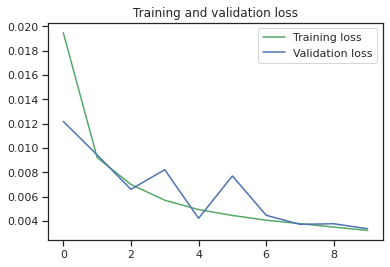

In [0]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
plt.figure()
plt.plot(loss, 'g', label='Training loss')
plt.plot(val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
#categorical to one-hot encoding
from keras.utils import to_categorical
train_Y_one_hot = to_categorical(y_train_np)



In [0]:
X_train_n,X_valid_n,y_train_n,y_valid_n = train_test_split(X_train_sd.reshape(-1, 28,28, 1),
                                              train_Y_one_hot,test_size=0.2,random_state=13)


In [0]:
def encoder(input_image):  
    conv_lyr_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_image)
    conv_lyr_1 = BatchNormalization()(conv_lyr_1)
    conv_lyr_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv_lyr_1)
    conv_lyr_1 = BatchNormalization()(conv_lyr_1)
    pool_lyr_1 = MaxPooling2D(pool_size=(2, 2))(conv_lyr_1) 
    conv_lyr_2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool_lyr_1)
    conv_lyr_2 = BatchNormalization()(conv_lyr_2)
    conv_lyr_2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv_lyr_2)
    conv_lyr_2 = BatchNormalization()(conv_lyr_2)
    pool_lyr_1  = MaxPooling2D(pool_size=(2, 2))(conv_lyr_2)
    conv_lyr_3  = Conv2D(128, (3, 3), activation='relu', padding='same')(pool_lyr_1 )
    conv_lyr_3  = BatchNormalization()(conv_lyr_3 )
    conv_lyr_3  = Conv2D(128, (3, 3), activation='relu', padding='same')(conv_lyr_3 )
    conv_lyr_3  = BatchNormalization()(conv_lyr_3 )
    conv_lyr_4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv_lyr_3 )
    conv_lyr_4 = BatchNormalization()(conv_lyr_4)
    conv_lyr_4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv_lyr_4)
    conv_lyr_4 = BatchNormalization()(conv_lyr_4)
    return conv_lyr_4


In [0]:
def fully_conn_lyr(input_enco):
    flatten_1= Flatten()(input_enco)
    dense_1 = Dense(128, activation='relu')(flatten_1)
    output_lyr = Dense(num_classes, activation='softmax')(dense_1)
    return output_lyr

In [0]:
encode = encoder(input_image)
final_model = Model(input_image,fully_conn_lyr(encode))


In [0]:
for w1,w2 in zip(final_model.layers[:19],autoencoder.layers[0:19]):
    w1.set_weights(w2.get_weights())


In [0]:
for layer in final_model.layers[0:19]:
    layer.trainable = False

In [0]:
final_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])


In [0]:
final_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_15 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_16 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 14, 14, 64)        1849

In [0]:
classify_train = final_model.fit(X_train_n, y_train_n, batch_size=64,epochs=10,verbose=1,validation_data=(X_valid_n, y_valid_n),callbacks=[monitor])


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 10s 201us/step - loss: 0.4882 - accuracy: 0.8080 - val_loss: 0.3821 - val_accuracy: 0.8477
Epoch 2/10
48000/48000 [==============================] - 9s 194us/step - loss: 0.3481 - accuracy: 0.8586 - val_loss: 0.3722 - val_accuracy: 0.8535
Epoch 3/10
48000/48000 [==============================] - 9s 194us/step - loss: 0.3022 - accuracy: 0.8789 - val_loss: 0.3766 - val_accuracy: 0.8559
Epoch 4/10
48000/48000 [==============================] - 9s 194us/step - loss: 0.2721 - accuracy: 0.8896 - val_loss: 0.3676 - val_accuracy: 0.8585
Epoch 5/10
48000/48000 [==============================] - 9s 195us/step - loss: 0.2536 - accuracy: 0.8975 - val_loss: 0.4254 - val_accuracy: 0.8499
Epoch 6/10
48000/48000 [==============================] - 9s 194us/step - loss: 0.2334 - accuracy: 0.9073 - val_loss: 0.3700 - val_accuracy: 0.8678
Epoch 7/10
48000/48000 [==============================] - 9s 

In [0]:
for layer in final_model.layers[0:19]:
    layer.trainable = True

In [0]:
final_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])


In [0]:
classify_train = final_model.fit(X_train_n, y_train_n, batch_size=64,epochs=25,verbose=1,validation_data=(X_valid_n, y_valid_n),callbacks=[monitor])


Train on 48000 samples, validate on 12000 samples
Epoch 1/25
48000/48000 [==============================] - 26s 535us/step - loss: 0.3551 - accuracy: 0.8592 - val_loss: 0.4064 - val_accuracy: 0.8477
Epoch 2/25
48000/48000 [==============================] - 25s 515us/step - loss: 0.2929 - accuracy: 0.8813 - val_loss: 0.4091 - val_accuracy: 0.8437
Epoch 3/25
48000/48000 [==============================] - 25s 516us/step - loss: 0.2518 - accuracy: 0.8995 - val_loss: 0.4045 - val_accuracy: 0.8528
Epoch 4/25
48000/48000 [==============================] - 25s 514us/step - loss: 0.2218 - accuracy: 0.9125 - val_loss: 0.4052 - val_accuracy: 0.8528
Epoch 5/25
48000/48000 [==============================] - 25s 515us/step - loss: 0.1908 - accuracy: 0.9234 - val_loss: 0.4137 - val_accuracy: 0.8579
Epoch 6/25
48000/48000 [==============================] - 25s 519us/step - loss: 0.1649 - accuracy: 0.9357 - val_loss: 0.4282 - val_accuracy: 0.8607
Epoch 7/25
48000/48000 [==============================] 

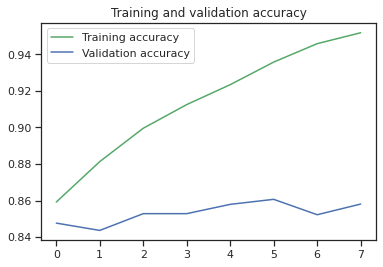

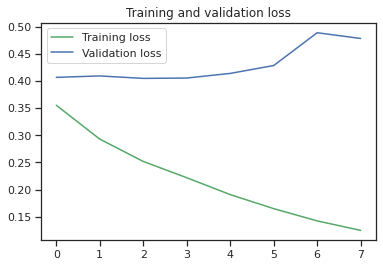

In [0]:
accuracy = classify_train.history['accuracy']
val_accuracy = classify_train.history['val_accuracy']
loss = classify_train.history['loss']
val_loss = classify_train.history['val_loss']
plt.plot( accuracy, 'g', label='Training accuracy')
plt.plot(val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(loss, 'g', label='Training loss')
plt.plot(val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
#classificaiton report
from sklearn.metrics import classification_report
y_pred = final_model.predict(X_valid_n)
y_pred_val = np.argmax(y_pred, axis=-1)
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4']
print(classification_report(np.argmax(y_valid_n, axis=1), y_pred_val, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.88      0.97      0.93      2406
     class 1       0.84      0.83      0.83      2408
     class 2       0.81      0.78      0.79      2423
     class 3       0.80      0.83      0.82      2417
     class 4       0.94      0.85      0.89      2346

    accuracy                           0.85     12000
   macro avg       0.85      0.85      0.85     12000
weighted avg       0.85      0.85      0.85     12000



In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix(np.argmax(y_valid_n, axis=1), y_pred_val)

array([[2345,   48,   13,    0,    0],
       [ 255, 1988,  131,   28,    6],
       [  40,  276, 1895,  186,   26],
       [   3,   37,  270, 2006,  101],
       [  13,   12,   39,  282, 2000]])

In [0]:
start = timeit.default_timer()
y_pred = final_model.predict(X_valid_n)
stop = timeit.default_timer()
t_basic_cnn_tuner=stop - start
print('Time: ', t_basic_cnn_tuner) 

Time:  1.9338094600000204


In [0]:
y_pred=final_model.predict(X_test_f)
y_pred_val = np.argmax(y_pred, axis=-1)

In [0]:
y_test_f=final_model.predict(X_test_f)
y_test_f=np.argmax(y_pred, axis=-1)
y_test_f_df=pd.DataFrame(y_test_f, columns=['Label'])
frames = [X_test_d['Id'],y_test_f_df]
output = pd.concat(frames,axis=1)

In [0]:
# from google.colab import files
# output.to_csv ('output.csv',index = False, header=True)
# files.download('output.csv')

**VGG 16 Implementation**

In [0]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

classes = np.unique(y_train_np)
num_classes = len(classes)
num_classes

5

In [0]:
#3 channels conversion
X_train=np.dstack([X_train_np] * 3)
X_test=np.dstack([X_test_np]*3)
X_train.shape,X_test.shape

((60000, 784, 3), (10000, 784, 3))

In [0]:
X_train = X_train.reshape(-1, 28,28,3)
X_test= X_test.reshape (-1,28,28,3)
X_train.shape,X_test.shape

((60000, 28, 28, 3), (10000, 28, 28, 3))

In [0]:
# Resize the images 48*48 for VGG16
from keras.preprocessing.image import img_to_array, array_to_img
X_train = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in X_train])
X_test = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in X_test])
X_train.shape, X_test.shape

((60000, 48, 48, 3), (10000, 48, 48, 3))

In [0]:
# Normalise the data 
X_train = X_train / 255.
X_test = X_test / 255.
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


In [0]:
#one hot encoded format
from keras.utils import to_categorical
train_Y_one_hot = to_categorical(y_train_np)


In [0]:
X_train,X_valid,y_train,y_valid = train_test_split(X_train,
                                                  train_Y_one_hot,
                                                  test_size=0.2,
                                                  random_state=13
                                                  )


In [0]:
x_dim = 48
y_dim = 48
chan = 3
batch_size = 16

In [0]:
# Preprocessing the input 
X_train = preprocess_input(X_train)
X_valid = preprocess_input(X_valid)
X_test  = preprocess_input (X_test)


In [0]:
#base model of VGG16
VGG_base = VGG16(weights='imagenet',
                  include_top=False, 
                  input_shape=(y_dim, x_dim, chan)
                 )
VGG_base.summary()


58892288/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
______________________________________________________________

In [0]:
# Extracting features
X_train_feat = VGG_base.predict(np.array(X_train), batch_size=batch_size, verbose=1)
X_test_feat = VGG_base.predict(np.array(X_test), batch_size=batch_size, verbose=1)
X_valid_features = VGG_base.predict(np.array(X_valid), batch_size=batch_size, verbose=1)

12000/12000 [==============================] - 8s 703us/step


In [0]:
# Feature flattening
X_train_feat_flat = np.reshape(X_train_feat, (48000, 1*1*512))
X_test_feat_flat = np.reshape(X_test_feat, (10000, 1*1*512))
X_valid_feat_flat = np.reshape(X_valid_features, (12000, 1*1*512))


In [0]:
from keras import models
from keras.models import Model
from keras import layers
from keras import optimizers
from keras import callbacks
from keras.layers.advanced_activations import LeakyReLU


In [0]:
epoch = 100
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_dim=(1*1*512)))
model.add(layers.LeakyReLU(alpha=0.1))
model.add(layers.Dense(num_classes, activation='softmax'))


In [0]:
# Compiling the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(),
    metrics=['acc'])

In [0]:
reduce_learning = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    patience=2,
    verbose=1,
    factor=0.2,
    cooldown=2,
    mode='auto',
    epsilon=0.0001,
    min_lr=0)

eary_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    min_delta=1e-3,
    verbose=1,
    mode='auto')
callbacks = [reduce_learning, eary_stopping]


/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:998: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


In [0]:
# Train the the model
history = model.fit(
    X_train_feat_flat,
    y_train,
    epochs=epoch,
    validation_data=(X_valid_feat_flat, y_valid),
    callbacks=callbacks
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 5s 97us/step - loss: 1.3507 - acc: 0.4027 - val_loss: 1.1633 - val_acc: 0.4438
Epoch 2/100
48000/48000 [==============================] - 5s 97us/step - loss: 1.1524 - acc: 0.4926 - val_loss: 1.1065 - val_acc: 0.5006
Epoch 3/100
48000/48000 [==============================] - 5s 99us/step - loss: 1.0683 - acc: 0.5363 - val_loss: 1.0475 - val_acc: 0.5198
Epoch 4/100
48000/48000 [==============================] - 5s 96us/step - loss: 1.0116 - acc: 0.5665 - val_loss: 0.9798 - val_acc: 0.5830
Epoch 5/100
48000/48000 [==============================] - 5s 97us/step - loss: 0.9739 - acc: 0.5831 - val_loss: 0.9890 - val_acc: 0.5803
Epoch 6/100
48000/48000 [==============================] - 5s 97us/step - loss: 0.9450 - acc: 0.6012 - val_loss: 0.9665 - val_acc: 0.5897
Epoch 7/100
48000/48000 [==============================] - 5s 96us/step - loss: 0.9175 - acc: 0.6154 - val_loss: 0.9185 - 

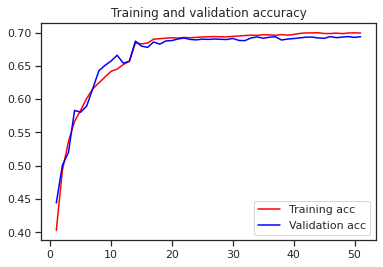

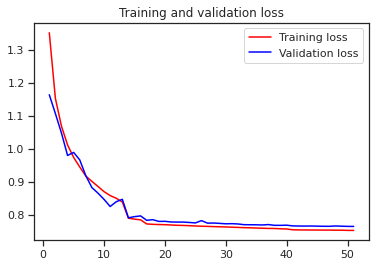

In [0]:
# plot the loss and accuracy
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

In [0]:
#classificaiton report
from sklearn.metrics import classification_report
y_pred = model.predict_classes(X_valid_feat_flat)
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4']
print(classification_report(np.argmax(y_valid, axis=1),y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.80      0.85      0.82      2406
     class 1       0.64      0.68      0.65      2408
     class 2       0.61      0.54      0.57      2423
     class 3       0.65      0.67      0.66      2417
     class 4       0.77      0.73      0.75      2346

    accuracy                           0.69     12000
   macro avg       0.69      0.69      0.69     12000
weighted avg       0.69      0.69      0.69     12000



In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix(np.argmax(y_valid, axis=1), y_pred)

array([[2050,  310,   43,    1,    2],
       [ 327, 1627,  347,   50,   57],
       [ 138,  434, 1298,  406,  147],
       [   9,  127,  333, 1630,  318],
       [  51,   64,  104,  407, 1720]])

In [0]:
start = timeit.default_timer()
y_pred = model.predict_classes(X_valid_feat_flat)
stop = timeit.default_timer()
t_basic_cnn_tuner=stop - start
print('Time: ', t_basic_cnn_tuner) 

Time:  0.22752772299963908


In [0]:
y_test_f=model.predict_classes(X_test_feat_flat)
y_test_f_df=pd.DataFrame(y_test_f, columns=['Label'])

In [0]:
frames = [X_test_d['Id'],y_test_f_df]
output = pd.concat(frames,axis=1)
X_test_d['Id']

0          0
1          1
2          2
3          3
4          4
        ... 
9995    9995
9996    9996
9997    9997
9998    9998
9999    9999
Name: Id, Length: 10000, dtype: int64

In [0]:
# from google.colab import files
# output.to_csv ('output.csv',index = False, header=True)
# files.download('output.csv')